In [1]:
# ipynb形式のライブラリのインポート
%run ./lib.ipynb

cg
[16, 6, 0]
ep
[9, 0, 0]
lu
[29, 10, 3]
all
[54, 16, 3]


Text(0.5, -0.01, '全体での集計結果')

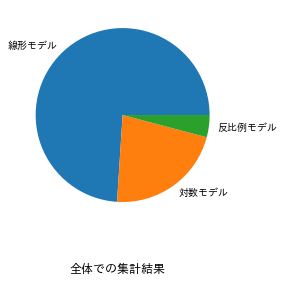

In [15]:
csv_directory_path = './tmp_GenerateScoreTable/'
result_of_all = [0, 0, 0]
for benchmark in benchmarks:
    result_of_benchmark = [0, 0, 0]
    file_name = benchmark+'.csv'
    file_path = csv_directory_path+file_name
    if(os.path.isfile(csv_directory_path+file_name) == False):
        continue
    # デバック用にベンチマークを1種類分で止めるようにする
    if(benchmark != "cg" and benchmark != "ep" and benchmark != "lu"):
        continue
    
    print(benchmark)
    df = pd.read_csv(file_path, index_col=0)
#     print(df)
    columns = df.columns.values
    indices = df.index.values
    for index in indices:
        row = df.loc[index].tolist()
        result_of_benchmark[row.index(min(row))] += 1
        result_of_all[row.index(min(row))] += 1
    
    
print("all")
print(result_of_all)

# 全体での集計結果をまとめた円グラフの出力
result_label = ["線形モデル", "対数モデル", "反比例モデル"]
plt.pie(result_of_all, labels=result_label)
plt.suptitle("全体での集計結果", y=-0.01)